In [1]:
import matplotlib.pyplot as plt
import requests
import nltk
import string
import contractions
import os
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from bs4.element import Comment
from IPython.display import clear_output

In [2]:
def filterWaste(word):
    stopWords = set(stopwords.words('english'))
    if word.lower() in stopWords:
        return False
    else:
        return True

In [3]:
def remove_punctuation(txt):
    PUNCT_TO_REMOVE = string.punctuation
    mytable=txt.maketrans('”“','  ',PUNCT_TO_REMOVE)
    return txt.translate(mytable)

In [4]:
def filterTags(element):
    if element.parent.name in [ "style", "script", "head", "title", "meta", "[document]" ]:
        return False
    if isinstance(element, Comment):
        return False
    return True

In [5]:
def scraping(web):
    data=requests.get(web)
    soup=BeautifulSoup(data.content,"html.parser")
    text=soup.find_all(text=True)
    filtered_text=filter(filterTags,text)
    word_count={}
    for text in filtered_text:
        text = contractions.fix(text)
        text = remove_punctuation(text)
        words = text.replace("\n", "").replace("\t", "").split(" ")       # replace all hidden chars
        words = list(filter(filterWaste, words))
        for i in words:
            if i.endswith("."):
                words.append(i.split(".")[0])
                words.remove(i)
            if i.endswith(","):
                words.append(i.split(",")[0])
                words.remove(i)
        for word in words:
            if word!="":
                if word in word_count:
                    word_count[word]+=1
                else:
                    word_count[word]=1
    word_count = sorted(word_count.items( ), key=lambda kv: kv[1], reverse=True)   # sort on value
    return list(word_count[ :7 ]) 

In [6]:
def displayResults(words, site):
    count = [item[1] for item in words][ : : -1 ]      # reverses order
    word = [item[0] for item in words][ : : -1 ]       # gets word out of reverses order
    plt.figure( figsize=(16, 9) )     # define how large the figure appears
    plt.bar(word, count)
    plt.title("Analyzing Top Words from: {}...".format( site[ :50 ] ), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    if input("Would you like to save the image of a bar plot(y/n)?").lower()=='y':
        file_name=input("What would you like to put the name of a file with a format(Ex-image_file.jpg)?")
        plt.savefig(file_name)
        plt.show()
        print("The file named {} is saved at location - {}".format(file_name,os.getcwd()))
    else:
        plt.show()

Enter a website to analyze:https://github.com/new
The top word is GitHub
Would you like to save the image of a bar plot(y/n)?y
What would you like to put the name of a file with a format(Ex-image_file.jpg)?new


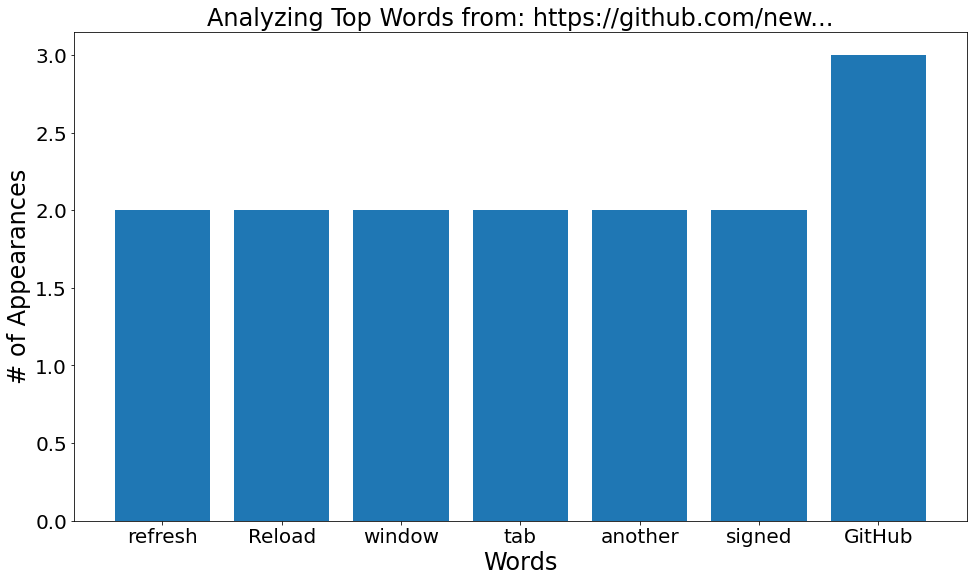

The file named new is saved at location - C:\Users\Rahul\python_bootcamp
Would you like to scrape a website (y/n)?n
Thanks for analyzing! Come back again!


In [7]:
while input("Would you like to scrape a website (y/n)?").lower()=='y':
    #try:
        clear_output()
        web_site=input("Enter a website to analyze:")
        top_words=scraping(web_site) 
        top_word=top_words[0]
        print("The top word is {}".format(top_word[0]))
        displayResults(top_words, web_site)
    #except:
      #  print("Something went wrong, please try again!")
print("Thanks for analyzing! Come back again!")